In [1]:
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ganesh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
train = pd.read_csv('train.csv')

In [5]:
train.shape

(38932, 5)

In [6]:
train.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy


In [7]:
df = train

In [8]:
df.shape

(38932, 5)

In [9]:
df.describe().T

,count,unique,top,freq
User_ID,38932,38932,id31067,1
Description,38932,38932,Had a great experience at the hotel until depa...,1
Browser_Used,38932,11,Firefox,7367
Device_Used,38932,3,Desktop,15026
Is_Response,38932,2,happy,26521


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38932 entries, 0 to 38931
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User_ID       38932 non-null  object
 1   Description   38932 non-null  object
 2   Browser_Used  38932 non-null  object
 3   Device_Used   38932 non-null  object
 4   Is_Response   38932 non-null  object
dtypes: object(5)
memory usage: 1.5+ MB


In [11]:
df['Is_Response'].value_counts()

happy        26521
not happy    12411
Name: Is_Response, dtype: int64

In [12]:
df['len_rev']= df['Description'].apply(len)

In [13]:
df

,User_ID,Description,Browser_Used,Device_Used,Is_Response,len_rev
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy,248
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy,1077
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy,1327
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy,502
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy,1613
...,...,...,...,...,...,...
38927,id49253,We arrived late at night and walked in to a ch...,Edge,Desktop,happy,769
38928,id49254,The only positive impression is location and p...,InternetExplorer,Mobile,not happy,533
38929,id49255,Traveling with friends for shopping and a show...,Firefox,Mobile,not happy,1065
38930,id49256,The experience was just ok. We paid extra for ...,Chrome,Desktop,not happy,519


In [14]:
df.groupby('Is_Response')['len_rev'].mean()

Is_Response
happy         784.695600
not happy    1040.606236
Name: len_rev, dtype: float64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002867626AA08>,
      dtype=object)

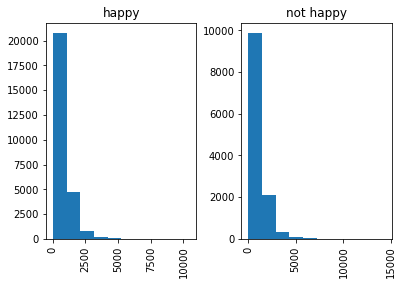

In [15]:
df.hist(column = 'len_rev',by = 'Is_Response')

In [16]:
len(df)

38932

In [17]:
happy_len =len(df[df['Is_Response']=='happy'])
not_happy_len = len(df[df['Is_Response']=='not happy'])

In [18]:
happ_per = happy_len/len(df)
not_happ_per = not_happy_len/len(df)

In [19]:
print(happ_per)
print(not_happ_per)

0.6812133977191
0.31878660228090006


In [20]:
df

,User_ID,Description,Browser_Used,Device_Used,Is_Response,len_rev
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy,248
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy,1077
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy,1327
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy,502
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy,1613
...,...,...,...,...,...,...
38927,id49253,We arrived late at night and walked in to a ch...,Edge,Desktop,happy,769
38928,id49254,The only positive impression is location and p...,InternetExplorer,Mobile,not happy,533
38929,id49255,Traveling with friends for shopping and a show...,Firefox,Mobile,not happy,1065
38930,id49256,The experience was just ok. We paid extra for ...,Chrome,Desktop,not happy,519


In [21]:
df.drop(columns = ['User_ID','Browser_Used','Device_Used','len_rev'],inplace = True)

In [22]:
df

,Description,Is_Response
0,The room was kind of clean but had a VERY stro...,not happy
1,I stayed at the Crown Plaza April -- - April -...,not happy
2,I booked this hotel through Hotwire at the low...,not happy
3,Stayed here with husband and sons on the way t...,happy
4,My girlfriends and I stayed here to celebrate ...,not happy
...,...,...
38927,We arrived late at night and walked in to a ch...,happy
38928,The only positive impression is location and p...,not happy
38929,Traveling with friends for shopping and a show...,not happy
38930,The experience was just ok. We paid extra for ...,not happy


In [23]:
import re
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [24]:
def clean_text(text):
    text = re.sub(r'[^a-zA-Z]',' ',text)
    text = text.lower()
    text = text.split()
    words = [ps.stem(word) for word in text if word not in stop_words]
    return ' '.join(words)

In [25]:
df.tail(1)['Description'].apply(clean_text)

38931    westin wonder restor grand dame hotel bed line...
Name: Description, dtype: object

In [26]:
df['cleaned_text']=df['Description'].apply(clean_text)

In [27]:
df

,Description,Is_Response,cleaned_text
0,The room was kind of clean but had a VERY stro...,not happy,room kind clean strong smell dog gener averag ...
1,I stayed at the Crown Plaza April -- - April -...,not happy,stay crown plaza april april staff friendli at...
2,I booked this hotel through Hotwire at the low...,not happy,book hotel hotwir lowest price could find got ...
3,Stayed here with husband and sons on the way t...,happy,stay husband son way alaska cruis love hotel g...
4,My girlfriends and I stayed here to celebrate ...,not happy,girlfriend stay celebr th birthday plan weeken...
...,...,...,...
38927,We arrived late at night and walked in to a ch...,happy,arriv late night walk check area complet flood...
38928,The only positive impression is location and p...,not happy,posit impress locat public park opposit site s...
38929,Traveling with friends for shopping and a show...,not happy,travel friend shop show locat great best say r...
38930,The experience was just ok. We paid extra for ...,not happy,experi ok paid extra view pool got view palm t...


In [28]:
def one_hot(text):
    if text == 'not happy':
        return 1
    else:
        return 0

In [29]:
df['label']=df['Is_Response'].apply(one_hot)

In [30]:
df

,Description,Is_Response,cleaned_text,label
0,The room was kind of clean but had a VERY stro...,not happy,room kind clean strong smell dog gener averag ...,1
1,I stayed at the Crown Plaza April -- - April -...,not happy,stay crown plaza april april staff friendli at...,1
2,I booked this hotel through Hotwire at the low...,not happy,book hotel hotwir lowest price could find got ...,1
3,Stayed here with husband and sons on the way t...,happy,stay husband son way alaska cruis love hotel g...,0
4,My girlfriends and I stayed here to celebrate ...,not happy,girlfriend stay celebr th birthday plan weeken...,1
...,...,...,...,...
38927,We arrived late at night and walked in to a ch...,happy,arriv late night walk check area complet flood...,0
38928,The only positive impression is location and p...,not happy,posit impress locat public park opposit site s...,1
38929,Traveling with friends for shopping and a show...,not happy,travel friend shop show locat great best say r...,1
38930,The experience was just ok. We paid extra for ...,not happy,experi ok paid extra view pool got view palm t...,1


In [31]:
df.drop(columns = ['Description','Is_Response'],inplace = True)

In [32]:
df

,cleaned_text,label
0,room kind clean strong smell dog gener averag ...,1
1,stay crown plaza april april staff friendli at...,1
2,book hotel hotwir lowest price could find got ...,1
3,stay husband son way alaska cruis love hotel g...,0
4,girlfriend stay celebr th birthday plan weeken...,1
...,...,...
38927,arriv late night walk check area complet flood...,0
38928,posit impress locat public park opposit site s...,1
38929,travel friend shop show locat great best say r...,1
38930,experi ok paid extra view pool got view palm t...,1


In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()

In [34]:
from sklearn.feature_extraction.text import CountVectorizer
cv_vect = CountVectorizer()

In [35]:
X_cv = cv_vect.fit_transform(df['cleaned_text'])

In [36]:
X = tf.fit_transform(df['cleaned_text'])

In [37]:
len(tf.get_feature_names())

31941

In [38]:
tf.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': None,
 'min_df': 1,
 'ngram_range': (1, 1),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [39]:
y = df['label']

In [40]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(X,y,test_size = 0.3,random_state = 101)

In [41]:
print(train_x)

  (0, 1140)	0.4879129836232539
  (0, 1887)	0.3946301112555638
  (0, 19830)	0.3783503235477489
  (0, 5478)	0.38243127922999964
  (0, 11300)	0.25726012049377034
  (0, 28610)	0.19016838181849605
  (0, 25693)	0.217595172194391
  (0, 9881)	0.1374711434614318
  (0, 22295)	0.15123209839317467
  (0, 28168)	0.17384005169040165
  (0, 907)	0.15032803488298072
  (0, 29959)	0.12527058177655415
  (0, 15796)	0.1414173855916294
  (0, 24816)	0.10067136968108886
  (0, 9763)	0.11158512864844493
  (0, 5812)	0.10655883904398712
  (0, 23786)	0.053760683885073976
  (1, 22590)	0.22793072183505872
  (1, 30870)	0.19738023174045732
  (1, 30067)	0.1962064234783097
  (1, 15900)	0.27501899328714713
  (1, 8431)	0.16230102371528707
  (1, 20150)	0.2407275648538231
  (1, 30829)	0.1533716458219481
  (1, 1671)	0.13840703301155968
  :	:
  (27251, 10294)	0.16434546241557735
  (27251, 30930)	0.14961660520813921
  (27251, 28646)	0.18173077429383658
  (27251, 5806)	0.1997995512836175
  (27251, 4938)	0.11499219754399695
  (272

In [42]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [43]:
nb.fit(train_x,train_y)

MultinomialNB()

In [44]:
train_pred = nb.predict(train_x)
test_pred = nb.predict(test_x)

In [45]:
from sklearn.metrics import accuracy_score

In [46]:
print('train_accuracy is :',accuracy_score(train_y,train_pred))
print('test_accuracy is : ',accuracy_score(test_y,test_pred))

train_accuracy is : 0.8266182298546896
test_accuracy is :  0.8124143835616439


In [47]:
def model_pred(X,y,model):
    train_x,test_x,train_y,test_y = train_test_split(X,y,test_size = 0.3,random_state = 101)
    model.fit(train_x,train_y)
    train_pred = model.predict(train_x)
    test_pred = model.predict(test_x)
    print('train_accuracy is :',accuracy_score(train_y,train_pred))
    print('test_accuracy is : ',accuracy_score(test_y,test_pred))    

In [48]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [49]:
model_pred(X,y,log_reg)

train_accuracy is : 0.9092910612065169
test_accuracy is :  0.8785958904109589


In [50]:
model_pred(X_cv,y,log_reg)

train_accuracy is : 0.9499486276236606
test_accuracy is :  0.8623287671232877


C:\Users\Ganesh\anaconda3\envs\spacyenv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [51]:
preds =tf.transform(['The stay was not good.We had very bad experience'])

In [52]:
def result(pred):
    preds = tf.transform([pred])
    op = log_reg.predict(preds)[0]
    if op ==1:
        return 'Negative review'
    else:
        return 'Postive Review'

In [53]:
result('The hotel was very good')

'Postive Review'

In [54]:
result("The food in the restaurant was delicious but priced a little on the high side. Of course this is Washington DC. There is no pool and little for children to do. My room on the fifth floor had two comfortable beds and plenty of space for one person. The TV is a little small by todays standards with a limited number of channels. There was a small bit of mold in the bathtub area that could have been removed with a little bleach. It appeared the carpets were not vacummed every day. I reported a light bulb was burned out. It was never replaced. Ice machines are on the odd numbered floors, but the one on my floor did not work. I encountered some staff in the elevator one evening and I mentioned the ice machine to them. Severel hours later a maid appeared at my door with ice and two mints. I'm not sure how they knew what room I was in. That was a little unnerving! I would stay here again for business, but would not come here on vacation")

'Negative review'

In [55]:
result("I am a devoted fan of TripAdvisor, and I decided to head to Boston last weekend to watch the Superbowl. After looking on tripadvisor, i settled on the Hotel Buckminster, and boy was i glad i did. This hotel is in a perfect location near Fenway Park. It is a bit out of the way from the more touristy areas, but the Kenmore Square Green line subway is next door, and easy access to all of Boston. We arrived and met a very nice fellow named Scott, and while check-in was at -, he allowed us to go up to our room at -. The room was small, but clean, and very comfortable with a Queen bed. It was a cute hotel setup, since the building is sort of like a horseshoe shape. I wasn't aware, but the famous architect Mr. White (of McKim, Mead, White fame) designed this! Anyhow, the hotel was clean, the staff wonderful, and for an inexpensive place which is next to Fenway, i highly recommend it!")

'Postive Review'

In [56]:
import pickle

In [57]:
with open('log_model','wb') as f:
    pickle.dump(log_reg,f)

In [58]:
with open('tf_transform','wb') as f:
    pickle.dump(tf,f)

## Word2vec

In [59]:
import gensim

In [60]:
len(df['cleaned_text'])

38932

In [67]:
df

,cleaned_text,label
0,room kind clean strong smell dog gener averag ...,1
1,stay crown plaza april april staff friendli at...,1
2,book hotel hotwir lowest price could find got ...,1
3,stay husband son way alaska cruis love hotel g...,0
4,girlfriend stay celebr th birthday plan weeken...,1
...,...,...
38927,arriv late night walk check area complet flood...,0
38928,posit impress locat public park opposit site s...,1
38929,travel friend shop show locat great best say r...,1
38930,experi ok paid extra view pool got view palm t...,1


In [78]:
review_list = []

In [74]:
ind_lines =df['cleaned_text'].values.tolist()

In [79]:
for line in ind_lines:
    words = nltk.word_tokenize(line)
    review_list.append(words)

In [81]:
review_list

[['room',
  'kind',
  'clean',
  'strong',
  'smell',
  'dog',
  'gener',
  'averag',
  'ok',
  'overnight',
  'stay',
  'fussi',
  'would',
  'consid',
  'stay',
  'price',
  'right',
  'breakfast',
  'free',
  'better',
  'noth'],
 ['stay',
  'crown',
  'plaza',
  'april',
  'april',
  'staff',
  'friendli',
  'attent',
  'elev',
  'tini',
  'food',
  'restaur',
  'delici',
  'price',
  'littl',
  'high',
  'side',
  'cours',
  'washington',
  'dc',
  'pool',
  'littl',
  'children',
  'room',
  'fifth',
  'floor',
  'two',
  'comfort',
  'bed',
  'plenti',
  'space',
  'one',
  'person',
  'tv',
  'littl',
  'small',
  'today',
  'standard',
  'limit',
  'number',
  'channel',
  'small',
  'bit',
  'mold',
  'bathtub',
  'area',
  'could',
  'remov',
  'littl',
  'bleach',
  'appear',
  'carpet',
  'vacum',
  'everi',
  'day',
  'report',
  'light',
  'bulb',
  'burn',
  'never',
  'replac',
  'ice',
  'machin',
  'odd',
  'number',
  'floor',
  'one',
  'floor',
  'work',
  'encoun

In [85]:
model = gensim.models.Word2Vec(sentences= review_list,min_count=5)

In [86]:
words = list(model.wv.vocab)

In [87]:
len(words)

10343

In [92]:
model.trainables

In [94]:
model.wv.most_similar('amaz')

[('fantast', 0.8705382347106934),
 ('awesom', 0.8619295358657837),
 ('fabul', 0.8515349626541138),
 ('wonder', 0.8337156772613525),
 ('terrif', 0.7569959759712219),
 ('great', 0.7473081350326538),
 ('superb', 0.7391537427902222),
 ('fab', 0.7369914650917053),
 ('outstand', 0.7335134744644165),
 ('incred', 0.6977163553237915)]

In [99]:
model.wv.most_similar('aw')

[('horribl', 0.8493439555168152),
 ('terribl', 0.8224135637283325),
 ('disgust', 0.7286859154701233),
 ('stink', 0.6602911949157715),
 ('nasti', 0.657677173614502),
 ('bad', 0.6495121717453003),
 ('unpleas', 0.6407479047775269),
 ('poor', 0.6364693641662598),
 ('crappi', 0.6246211528778076),
 ('okay', 0.6187676191329956)]

In [100]:
model.wv.doesnt_match('man car women'.split())

C:\Users\Ganesh\anaconda3\envs\spacyenv\lib\site-packages\gensim\models\keyedvectors.py:877: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'car'

In [104]:
(model.wv.get_vector('bad'))

array([ 0.30563453, -0.48695067, -1.317537  , -0.7961821 , -1.3405861 ,
       -2.1827047 , -2.3030102 , -0.2007646 ,  0.13860299,  0.10563931,
       -0.8039095 ,  1.7505405 ,  2.431772  ,  0.2646332 ,  0.7707057 ,
       -1.7135402 , -1.3162781 , -1.2177275 ,  0.4555767 , -0.31108892,
       -0.5074076 , -0.32243213,  0.01812299,  0.31651545, -0.33435315,
       -0.26928794,  1.1297438 , -0.60032564, -1.8292139 , -0.24808033,
       -1.5183651 , -1.4882338 , -1.5590795 ,  1.1838801 , -0.36359733,
       -0.51980215, -0.31399265, -0.7373752 , -0.35721737,  1.1394414 ,
       -0.6838386 ,  0.38609037, -1.6621269 , -1.0175571 ,  0.7897895 ,
       -1.0460902 , -0.05760976, -0.11519907, -0.87414956,  0.732052  ,
        1.6338177 ,  0.551233  , -1.0656558 , -1.0979966 ,  0.14585951,
       -1.8620707 ,  1.9055064 ,  0.34766132,  0.9271022 ,  1.3487206 ,
       -0.6571644 , -1.3280631 ,  1.2745208 ,  0.74186605,  0.25912672,
       -0.24662468,  0.8913305 ,  0.27602726, -0.09550175, -0.15

In [110]:
model['bad']

C:\Users\Ganesh\anaconda3\envs\spacyenv\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([ 0.30563453, -0.48695067, -1.317537  , -0.7961821 , -1.3405861 ,
       -2.1827047 , -2.3030102 , -0.2007646 ,  0.13860299,  0.10563931,
       -0.8039095 ,  1.7505405 ,  2.431772  ,  0.2646332 ,  0.7707057 ,
       -1.7135402 , -1.3162781 , -1.2177275 ,  0.4555767 , -0.31108892,
       -0.5074076 , -0.32243213,  0.01812299,  0.31651545, -0.33435315,
       -0.26928794,  1.1297438 , -0.60032564, -1.8292139 , -0.24808033,
       -1.5183651 , -1.4882338 , -1.5590795 ,  1.1838801 , -0.36359733,
       -0.51980215, -0.31399265, -0.7373752 , -0.35721737,  1.1394414 ,
       -0.6838386 ,  0.38609037, -1.6621269 , -1.0175571 ,  0.7897895 ,
       -1.0460902 , -0.05760976, -0.11519907, -0.87414956,  0.732052  ,
        1.6338177 ,  0.551233  , -1.0656558 , -1.0979966 ,  0.14585951,
       -1.8620707 ,  1.9055064 ,  0.34766132,  0.9271022 ,  1.3487206 ,
       -0.6571644 , -1.3280631 ,  1.2745208 ,  0.74186605,  0.25912672,
       -0.24662468,  0.8913305 ,  0.27602726, -0.09550175, -0.15

In [113]:
from sklearn.manifold import TSNE
tsne_model = TSNE(n_components=2,verbose=1)

In [118]:
tsne_model.fit_transform(model['great','good'])

[t-SNE] Computing 1 nearest neighbors...
[t-SNE] Indexed 2 samples in 0.000s...
[t-SNE] Computed neighbors for 2 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 2 / 2
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 29.818880
[t-SNE] KL divergence after 300 iterations: 0.000000


C:\Users\Ganesh\anaconda3\envs\spacyenv\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([[ -590.3823, -1333.3073],
       [  590.3821,  1333.307 ]], dtype=float32)

In [121]:
len(model.wv.vectors)

10343

In [123]:
X = model.wv.vectors

In [127]:
X.shape

(10343, 100)

In [124]:
y = df['label']

In [131]:
import bokeh.plotting as bp
from bokeh.models import HoverTool, BoxSelectTool
from bokeh.plotting import figure, show, output_notebook

#Defining the chart
output_notebook()
plot_chart = bp.figure(plot_width=700, plot_height=600, title="A map/plot of 5000 word vectors",
    tools="hover",
    x_axis_type=None, y_axis_type=None, min_border=1)

#Extracting the list of word vectors, limiting to 5000, each is of 200 dimensions
word_vectors = [model[w] for w in list(model.wv.vocab.keys())[:5000]]

# Reducing dimensionality by converting the vectors to 2d vectors
from sklearn.manifold import TSNE
tsne_model = TSNE(n_components=2, verbose=1, random_state=0)
tsne_w2v = tsne_model.fit_transform(word_vectors)

# Storing data in a dataframe
tsne_df = pd.DataFrame(tsne_w2v, columns=['x', 'y'])
tsne_df['words'] = list(model.wv.vocab.keys())[:5000]

# Corresponding word appears when you hover on the data point.
plot_chart.scatter(x='x', y='y', source=tsne_df)
hover = plot_chart.select(dict(type=HoverTool))
hover.tooltips={"word": "@words"}
show(plot_chart)

Loading BokehJS ...

C:\Users\Ganesh\anaconda3\envs\spacyenv\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if sys.path[0] == '':


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.201s...
[t-SNE] Computed neighbors for 5000 samples in 10.476s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.329996
[t-SNE] KL divergence after 250 iterations with early exaggeration: 84.034271
[t-SNE] KL divergence after 1000 iterations: 2.269085


In [133]:
file_name = 'word2vec.txt'
model.wv.save_word2vec_format(file_name,binary=False)